In [78]:
import os
import re

import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import seaborn as sns
import torch
import tifffile
import yaml
from torchio.transforms import Resize
from einops import rearrange

import napari

In [79]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
%autoreload 2

In [81]:
from mushroom.visualization.utils import display_labeled_as_rgb

In [189]:
d = np.load('/Users/erikstorrs/Documents/ding/mushroom/data/subclone/HT268B1/analysis_output_v4.npy', allow_pickle=True).item()
d = np.load('/Users/erikstorrs/Documents/ding/mushroom/data/subclone/HT397B1/analysis_output_v2.npy', allow_pickle=True).item()


d.keys()

dict_keys(['interp_volume', 'labels'])

In [190]:
d['labels']

['TME_0',
 'TME_1',
 'TME_10',
 'TME_11',
 'TME_12',
 'TME_13',
 'TME_14',
 'TME_2',
 'TME_3',
 'TME_4',
 'TME_5',
 'TME_6',
 'TME_7',
 'TME_8',
 'TME_9',
 'clone_1',
 'clone_2',
 'clone_3',
 'unlabeled']

In [191]:
order = d['labels']
volume = np.zeros((d['interp_volume'].shape[0], d['interp_volume'].shape[1], d['interp_volume'].shape[2], len(order)))
for i in range(len(order)):
    volume[..., i] = d['interp_volume'] == i
volume = volume.astype(np.float32)
volume.shape, np.unique(volume)
    

((2, 60, 60, 19), array([0., 1.], dtype=float32))

In [192]:
# interp_volume = d['volume']
interp_volume = volume
clusters = d['labels']
interp_volume.shape

(2, 60, 60, 19)

In [193]:
# transform = Resize((interp_volume.shape[0] * 1, interp_volume.shape[1] * 10, interp_volume.shape[2] * 10))

# x = rearrange(interp_volume, 'n h w d -> d n h w')
# resized = transform(x)
# interp_volume = rearrange(resized, 'd n h w -> n h w d')
# interp_volume.shape

In [194]:
clusters

['TME_0',
 'TME_1',
 'TME_10',
 'TME_11',
 'TME_12',
 'TME_13',
 'TME_14',
 'TME_2',
 'TME_3',
 'TME_4',
 'TME_5',
 'TME_6',
 'TME_7',
 'TME_8',
 'TME_9',
 'clone_1',
 'clone_2',
 'clone_3',
 'unlabeled']

In [195]:
# import skimage
# idx = list(clusters).index('TME_NBHD_4')
# vertices, faces, normals, values = skimage.measure.marching_cubes(interp_volume[..., idx], .1)

In [196]:
# viewer = napari.Viewer(ndisplay=3)

# # for i, cluster in enumerate(clusters):
# #     try:
# #         vertices, faces, normals, values = skimage.measure.marching_cubes(interp_volume[..., i], .1)
# #         viewer.add_surface(
# #             (vertices, faces, values),
# #             name=f'{cluster}',
# #             visible=False,
# #             opacity=1.,
# #         )
# #     except ValueError:
# #         pass
    
# for i, cluster in enumerate(clusters):
#     viewer.add_image(
#         interp_volume[..., i],
#         name=f'{cluster}',
#         visible=False,
#         opacity=1.,
#         rendering='iso',
#     )
    

In [197]:
blank = np.zeros((1, interp_volume.shape[-3], interp_volume.shape[-2], interp_volume.shape[-1]),
                 dtype=interp_volume.dtype)
interp_volume = np.vstack([
#     blank,
    interp_volume,
#     blank,
])

In [198]:
# viewer = napari.Viewer(ndisplay=3)

# for i, cluster in enumerate(clusters):
#     try:
#         vertices, faces, normals, values = skimage.measure.marching_cubes(interp_volume[..., i], .1,
#                                                                          spacing=(.2, 1.0, 1.0), step_size=1.)
#         viewer.add_surface(
#             (vertices, faces, values),
#             name=f'{cluster}',
#             visible=False,
#             opacity=1.,
#         )
#     except ValueError:
#         pass
    
# for i, cluster in enumerate(clusters):
#     viewer.add_image(
#         interp_volume[..., i],
#         name=f'img_{cluster}',
#         visible=False,
#         opacity=1.,
#     )
    

In [199]:
# viewer = napari.Viewer(ndisplay=3)

# X = d['interp_volume'].copy() + 1
# blank = np.zeros((1, X.shape[-2], X.shape[-1]), dtype=X.dtype)
# X = np.vstack([
#     blank,
#     X,
#     blank,
# ])

# mapping = {x:[f'cluster {x}'] for x in np.unique(X)}

# viewer.add_labels(X, num_colors=len(np.unique(X)), properties=mapping)

In [200]:
clusters

['TME_0',
 'TME_1',
 'TME_10',
 'TME_11',
 'TME_12',
 'TME_13',
 'TME_14',
 'TME_2',
 'TME_3',
 'TME_4',
 'TME_5',
 'TME_6',
 'TME_7',
 'TME_8',
 'TME_9',
 'clone_1',
 'clone_2',
 'clone_3',
 'unlabeled']

In [204]:
cmap = sns.color_palette('tab20') + sns.color_palette('tab20b')
cmap[clusters.index('clone_1')] = sns.color_palette()[1]
cmap[clusters.index('clone_2')] = sns.color_palette()[2]
cmap[clusters.index('clone_3')] = sns.color_palette()[3]
cmap[clusters.index('TME_12')] = sns.color_palette()[4]

In [205]:
viewer = napari.Viewer(ndisplay=3)
for i, cluster in enumerate(clusters):
    viewer.add_labels(interp_volume[..., i].astype(int), name=cluster, visible=False, opacity=1., color={1:cmap[i]}, num_colors=1)

In [141]:
cmap[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

In [110]:
interp_volume.shape

(16, 60, 60, 9)

In [100]:
import napari
from skimage import data
from scipy import ndimage as ndi

blobs = data.binary_blobs(length=128, volume_fraction=0.1, n_dim=3)
blobs.shape

(128, 128, 128)

In [101]:
np.unique(blobs)

array([False,  True])

In [102]:
labeled = ndi.label(blobs)[0]
labeled.shape

(128, 128, 128)

In [ ]:
labels_layer = viewer.add_labels(labeled, name='blob ID')
viewer.dims.ndisplay = 3

In [36]:
surface = (vertices, faces, values)

viewer = napari.view_surface(surface) 

In [15]:
d

array({'macro_volume': array([[[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         ...,
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.000000

In [108]:
section_positions = np.asarray([0, 4, 5, 6, 7])
volume.shape

(5, 60, 60, 18)

In [109]:
from torchio.transforms import Resize

In [110]:
section_range = (section_positions.min(), section_positions.max())

interp_volume = np.zeros((section_range[-1], volume.shape[1], volume.shape[2], volume.shape[3]), dtype=np.float32)
for i in range(volume.shape[0] - 1):
    l1, l2 = section_positions[i], section_positions[i+1]
    stack = rearrange(volume[i:i+2], 'n h w d -> d n h w')
    transform = Resize((l2 - l1, stack.shape[-2], stack.shape[-1]))
    resized = transform(stack)
    interp_volume[l1:l2] = rearrange(resized, 'd n h w -> n h w d')
    
blank = np.zeros((1, interp_volume.shape[-3], interp_volume.shape[-2], interp_volume.shape[-1]),
                 dtype=interp_volume.dtype)
interp_volume = np.vstack([
    blank,
    interp_volume,
    blank 
])

interp_volume.shape

(9, 60, 60, 18)

In [111]:
# interp_volume = np.stack([
#     skimage.filters.gaussian(x)
#     for x in rearrange(interp_volume, 'n h w d -> d h w n')
# ])
# interp_volume = rearrange(interp_volume, 'd h w n -> n h w d')
# interp_volume.shape

# blank = np.zeros((1, interp_volume.shape[-3], interp_volume.shape[-2], interp_volume.shape[-1]),
#                  dtype=interp_volume.dtype)
# interp_volume = np.vstack([
#     blank,
#     interp_volume,
#     blank 
# ])

In [112]:
transform = Resize((interp_volume.shape[0], interp_volume.shape[1] * 5, interp_volume.shape[2] * 5))

x = rearrange(interp_volume, 'n h w d -> d n h w')
resized = transform(x)
interp_volume = rearrange(resized, 'd n h w -> n h w d')
interp_volume.shape

(9, 300, 300, 18)

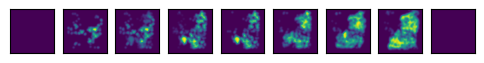

In [113]:
fig, axs = plt.subplots(ncols=interp_volume.shape[0], figsize=(6, 4))
for i, m in enumerate(interp_volume):
    axs[i].imshow(m[..., 5])
    axs[i].set_xticks([])
    axs[i].set_yticks([])

In [104]:
interp_volume.max()

0.90970075

In [105]:
import skimage
vertices, faces, normals, values = skimage.measure.marching_cubes(interp_volume[..., 5], .1)

In [106]:
# vertices = np.array([[0, 0], [0, 20], [10, 0], [10, 10]])
# faces = np.array([[0, 1, 2], [1, 2, 3]])
# values = np.linspace(0, 1, len(vertices))
surface = (vertices, faces, values)

viewer = napari.view_surface(surface)  # add the surface

In [4]:
output_dir = '/Users/erikstorrs/Documents/ding/mushroom/data/subclone/HT397B1/outputs'
config_filepath = os.path.join(output_dir, 'mushroom_config_local.yaml')
outputs_filepath = os.path.join(output_dir, 'outputs.pt')

In [5]:
data = torch.load(outputs_filepath)
data.keys()

dict_keys(['recon_embs', 'recon_imgs', 'true_imgs', 'cluster_distances', 'cluster_distance_volume', 'cluster_centroids', 'cluster_ids'])

In [6]:
for k, v in data.items():
    print(k, v.shape)

recon_embs torch.Size([2, 256, 60, 60])
recon_imgs torch.Size([2, 11622, 60, 60])
true_imgs torch.Size([2, 11622, 60, 60])
cluster_distances torch.Size([2, 60, 60, 20])
cluster_distance_volume torch.Size([200, 60, 60, 20])
cluster_centroids torch.Size([20, 256])
cluster_ids torch.Size([2, 60, 60])


In [7]:
def to_uint8(x):
    if isinstance(x, torch.Tensor):
        x = x.numpy()
    x = x.astype(np.float32)
    # x -= x.min()
    
    x /= x.max()
    x *= 255.
    x = x.astype(np.uint8)
    return x

In [8]:
viewer = napari.Viewer(ndisplay=3)

for i in range(data['cluster_distance_volume'])

In [ ]:
viewer.add_image(
    x,
    depiction='volume',
    rendering='iso',
    iso_threshold=10.,
    name=f'cluster {cluster}',
    visible=False
)